In [259]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [260]:
import datetime as dt

In [261]:
import numpy as np

In [262]:
import time

In [294]:
import matplotlib.pyplot as plt


In [263]:
candidates_list = [
    {
        "name": "Joe Biden",
        "party": "Democrat",
        "twitter_url": "https://twitter.com/JoeBiden",
        "twitter_screen_name": "JoeBiden",
        "twitter_user_id": "939091",
        "announcement_date": "April 25, 2019",
        "status": "running"
    },
    {
        "name": "Cory Booker",
        "party": "Democrat",
        "twitter_url": "https://twitter.com/CoryBooker",
        "twitter_screen_name": "CoryBooker",
        "twitter_user_id": "15808765",
        "announcement_date": "February 1, 2019",
        "status": "running"

    },
    {
        "name": "Pete Buttigieg",
        "party": "Democrat",
        "twitter_url": "https://twitter.com/PeteButtigieg",
        "twitter_screen_name": "PeteButtigieg",
        "twitter_user_id": "226222147",
        "announcement_date": "January 23, 2019",
        "status": "running"
    },
    {
        "name": "Julián Castro",
        "party": "Democrat",
        "twitter_url": "https://twitter.com/JulianCastro",
        "twitter_screen_name": "JulianCastro",
        "twitter_user_id": "19682187",
        "announcement_date": "January 12, 2019",
        "status": "running"
    },
    {
        "name": "John Delaney",
        "party": "Democrat",
        "twitter_url": "https://twitter.com/JohnDelaney",
        "twitter_screen_name": "JohnDelaney",
        "twitter_user_id": "426028646",
        "announcement_date": "August 10, 2017",
        "status": "running"
    },
    {
        "name": "Tulsi Gabbard",
        "party": "Democrat",
        "twitter_url": "https://twitter.com/TulsiGabbard",
        "twitter_screen_name": "TulsiGabbard",
        "twitter_user_id": "26637348",
        "announcement_date": "January 12, 2019",
        "status": "running"
    },
    {
        "name": "Kirsten Gillibrand",
        "party": "Democrat",
        "twitter_url": "https://twitter.com/SenGillibrand",
        "twitter_screen_name": "SenGillibrand",
        "twitter_user_id": "72198806",
        "announcment_date": "March 17, 2019",
        "status": "running"
    },
    {
        "name": "Mike Gravel",
        "party": "Democrat",
        "twitter_url": "https://twitter.com/MikeGravel",
        "twitter_screen_name": "MikeGravel",
        "twitter_user_id": "14709326",
        "announcment_date": "April 2, 2019",
        "status": "running"
    },
    {
        "name": "Kamala Harris",
        "party": "Democrat",
        "twitter_url": "https://twitter.com/KamalaHarris",
        "twitter_screen_name": "KamalaHarris",
        "twitter_user_id": "30354991",
        "announcment_date": "January 21, 2019",
        "status": "running"
    },
    {
        "name": "John Hickenlooper",
        "party": "Democrat",
        "twitter_url": "https://twitter.com/Hickenlooper",
        "twitter_screen_name": "Hickenlooper",
        "twitter_user_id": "117839957",
        "announcment_date": "March 4, 2019",
        "status": "running"
    },
    {
        "name": "Jay Inslee",
        "party": "Democrat",
        "twitter_url": "https://twitter.com/JayInslee",
        "twitter_screen_name": "JayInslee",
        "twitter_user_id": "21789463",
        "announcment_date": "March 1, 2019",
        "status": "running"
    },
    {
        "name": "Amy Klobuchar",
        "party": "Democrat",
        "twitter_url": "https://twitter.com/amyklobuchar",
        "twitter_screen_name": "amyklobuchar",
        "twitter_user_id": "33537967",
        "announcment_date": "February 10, 2019",
        "status": "running"
    },
    {
        "name": "Wayne Messam",
        "party": "Democrat",
        "twitter_url": "https://twitter.com/WayneMessam",
        "twitter_screen_name": "WayneMessam",
        "twitter_user_id": "33954145",
        "announcment_date": "March 13, 2019",
        "status": "running"
    },
    {
        "name": "Seth Moulton",
        "party": "Democrat",
        "twitter_url": "https://twitter.com/sethmoulton",
        "twitter_screen_name": "sethmoulton",
        "twitter_user_id": "248495200",
        "announcment_date": "April 22, 2019",
        "status": "running"
    },
    {
        "name": "Beto O'Rourke",
        "party": "Democrat",
        "twitter_url": "https://twitter.com/BetoORourke",
        "twitter_screen_name": "BetoORourke",
        "twitter_user_id": "342863309",
        "announcment_date": "March 14, 2019",
        "status": "running"
    },
    {
        "name": "Tim Ryan",
        "party": "Democrat",
        "twitter_url": "https://twitter.com/TimRyan",
        "twitter_screen_name": "TimRyan",
        "twitter_user_id": "466532637",
        "announcment_date": "April 4, 2019",
        "status": "running"
    },
    {
        "name": "Bernie Sanders",
        "party": "Independent",
        "twitter_url": "https://twitter.com/BernieSanders",
        "twitter_screen_name": "BernieSanders",
        "twitter_user_id": "216776631",
        "announcment_date": "February 19, 2019",
        "status": "running"
    },
    {
        "name": "Donald Trump",
        "party": "Republican",
        "twitter_url": "https://twitter.com/realDonaldTrump",
        "twitter_screen_name": "realDonaldTrump",
        "twitter_user_id": "25073877",
        "announcment_date": "January 20, 2017",
        "status": "running"
    },
    {
        "name": "Elizabeth Warren",
        "party": "Democrat",
        "twitter_url": "https://twitter.com/ewarren",
        "twitter_screen_name": "ewarren",
        "twitter_user_id": "357606935",
        "announcment_date": "February 9, 2019",
        "status": "running"
    },
    {
        "name": "Bill Weld",
        "party": "Republican",
        "twitter_url": "https://twitter.com/GovBillWeld",
        "twitter_screen_name": "GovBillWeld",
        "twitter_user_id": "734783792502575105",
        "announcment_date": "April 15, 2019",
        "status": "running"
    },
    {
        "name": "Marianne Williamson",
        "party": "Democrat",
        "twitter_url": "https://twitter.com/marwilliamson",
        "twitter_screen_name": "marwilliamson",
        "twitter_user_id": "21522338",
        "announcment_date": "January 28, 2019",
        "status": "running"
    },
    {
        "name": "Andrew Yang",
        "party": "Democrat",
        "twitter_url": "https://twitter.com/AndrewYang",
        "twitter_screen_name": "AndrewYang",
        "twitter_user_id": "2228878592",
        "announcment_date": "November 6, 2017",
        "status": "running"
    },
    {
        "name": "Eric Swalwell",
        "party": "Democrat",
        "twitter_url": "https://twitter.com/RepSwalwell",
        "twitter_screen_name": "RepSwalwell",
        "twitter_user_id": "942156122",
        "announcment_date": "April 8, 2019",
        "status": "dropped"
    },
    {
        "name": "Michael Bennet",
        "party": "Democrat",
        "twitter_url": "https://twitter.com/MichaelBennet",
        "twitter_screen_name": "MichaelBennet",
        "twitter_user_id": "45645232",
        "announcment_date": "May 2, 2019",
        "status": "running"
    },
    {
        "name": "Steve Bullock",
        "party": "Democrat",
        "twitter_url": "https://twitter.com/GovernorBullock",
        "twitter_screen_name": "GovernorBullock",
        "twitter_user_id": "111721601",
        "announcment_date": "May 14, 2019",
        "status": "running"
    },
    {
        "name": "Bill de Blasio",
        "party": "Democrat",
        "twitter_url": "https://twitter.com/BilldeBlasio",
        "twitter_screen_name": "BilldeBlasio",
        "twitter_user_id": "476193064",
        "announcment_date": "May 16, 2019",
        "status": "running"
    },
    {
        "name": "Joe Sestak",
        "party": "Democrat",
        "twitter_url": "https://twitter.com/JoeSestak",
        "twitter_screen_name": "JoeSestak",
        "twitter_user_id": "46764631",
        "announcment_date": "June 23, 2019",
        "status": "running"
    },
    {
        "name": "Tom Steyer",
        "party": "Democrat",
        "twitter_url": "https://twitter.com/TomSteyer",
        "twitter_screen_name": "TomSteyer",
        "twitter_user_id": "949934436",
        "announcment_date": "July 9, 2019",
        "status": "running"
    }
]

In [ ]:
time.struct_time(time.gmtime())

In [ ]:
struct_time = time.gmtime(time.time())

In [ ]:
dt.date(struct_time.tm_year, struct_time.tm_mon, struct_time.tm_mday)

In [264]:
# Create engine using the `demographics.sqlite` database file
engine = create_engine("sqlite:///../db/twitter_db.sqlite")

In [265]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [266]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [267]:
# Assign the dow class to a variable called `Dow`
Tweets = Base.classes.tweet_data

In [268]:
Update = Base.classes.database_update

In [181]:
from itertools import groupby

In [269]:
session = Session(engine)

In [273]:
type(session.query(Tweets.full_text).first()[0])

str

In [276]:
text_list = session.query(Tweets.full_text).all()

In [279]:
[next_list] = list(zip(*text_list))

In [282]:
another_list = list(next_list)

In [283]:
another_list

["Here's the deal, President Trump inherited the economy from the Obama-Biden Administration. And just like everything else he's been given in his life, he's in the process of squandering it. https://t.co/nSAOKwysmM",
 'I’ve got some exciting news: I am now on Snapchat! Subscribe to get a behind-the-scenes look at tonight’s #DemDebate and what’s happening on the campaign trail: https://t.co/AFamrxf91F https://t.co/LdYpSDWh9n',
 "A car accident took the lives of my first wife and baby daughter. My family was fortunate to have health insurance, but that's not the case for many.\n \nThis is why I fight. I believe deeply that health care is a right for all—not a privilege for the few. https://t.co/qsyFHn8jH9",
 "On what would have been his 46th birthday, my thoughts are with the family of my friend Reverend Clementa Pinckney. As we celebrate his life, let's continue on his legacy by living with compassion, kindness, and a relentless dedication to improving the lives of others. https://t.co

In [ ]:
another_list[0].encode

In [289]:
another_list

["Here's the deal, President Trump inherited the economy from the Obama-Biden Administration. And just like everything else he's been given in his life, he's in the process of squandering it. https://t.co/nSAOKwysmM",
 'I’ve got some exciting news: I am now on Snapchat! Subscribe to get a behind-the-scenes look at tonight’s #DemDebate and what’s happening on the campaign trail: https://t.co/AFamrxf91F https://t.co/LdYpSDWh9n',
 "A car accident took the lives of my first wife and baby daughter. My family was fortunate to have health insurance, but that's not the case for many.\n \nThis is why I fight. I believe deeply that health care is a right for all—not a privilege for the few. https://t.co/qsyFHn8jH9",
 "On what would have been his 46th birthday, my thoughts are with the family of my friend Reverend Clementa Pinckney. As we celebrate his life, let's continue on his legacy by living with compassion, kindness, and a relentless dedication to improving the lives of others. https://t.co

In [293]:
for text in another_list:
    new_text = text.replace("&amp;", "&")
    new_text = new_text.replace("\n", " ")
    print(new_text)
    

Here's the deal, President Trump inherited the economy from the Obama-Biden Administration. And just like everything else he's been given in his life, he's in the process of squandering it. https://t.co/nSAOKwysmM
I’ve got some exciting news: I am now on Snapchat! Subscribe to get a behind-the-scenes look at tonight’s #DemDebate and what’s happening on the campaign trail: https://t.co/AFamrxf91F https://t.co/LdYpSDWh9n
A car accident took the lives of my first wife and baby daughter. My family was fortunate to have health insurance, but that's not the case for many.   This is why I fight. I believe deeply that health care is a right for all—not a privilege for the few. https://t.co/qsyFHn8jH9
On what would have been his 46th birthday, my thoughts are with the family of my friend Reverend Clementa Pinckney. As we celebrate his life, let's continue on his legacy by living with compassion, kindness, and a relentless dedication to improving the lives of others. https://t.co/qDFArjl5Gb
Pres

Watch out folks, he’s starting early today https://t.co/iES6Ne7Q7T
You do not refer to human beings as animals. You just don’t.
What a game between two great teams! Looking forward to getting a taste of Hartford in the mail, mayor. #GoIrish https://t.co/kSdw73GoXm
The secret’s out about my secret weapon. Glad America loves him too! https://t.co/rYwRbzEoVM
Hey @Chas10Buttigieg I think I found us a new hangout in Manchester! https://t.co/OmhGTGYtPU
Me too—sign me and Chasten up for a pint in the city one Bloomsday! https://t.co/q5n3nvujxB
@MayorBronin, a friendly wager on @UConnWBB vs @ndwbb tonite? I’ll put up a selection of our finest South Bend Chocolate against whatever delicacy Hartford has to offer. #GoIrish
A powerful statement from a leader I admire. https://t.co/N9zFeqoNoS
I’m just lucky elections are multiple-choice. https://t.co/SFOxHFLFpn
Join me in South Bend on April 14th for a special announcement:   https://t.co/GfdYimuYN1 https://t.co/aPFe08yGmW
@KirstenPowers @Lis_Smith

#WorldEnvironmentDay https://t.co/qpzSWNe8zE
Trump’s decision to charge Assange under the Espionage Act will have a serious chilling effect on our freedom of speech and freedom of the press. It also undermines our democracy by keeping crucial information from the American people that they deserve to know. https://t.co/D3olp2JS4J
Ramadan is a time of prayer, fasting and reflection. Please join me in wishing Muslim Americans happiness as they celebrate Eid al-Fitr with family and friends. #EidMubarak!
Basically Americans will no longer be free to travel to Cuba, because Cuba is a communist country & therefore its’ people are not free. So now the Trump Administration, in the name of freedom, is taking away Americans' freedom. Make sense? https://t.co/bfnWf4p7f1
Our choice: more money for our families and communities, or trillions more wasted on regime change wars and the new cold war. https://t.co/VdDjVSN90S
We’ve made progress in the fight for LGBTQ civil rights, but much work remains. I

Marianne Williamson with an excellent introduction. Incredible. A new type of politician.
part 2  #DropOutDelaney https://t.co/ZFfCwcyt4z
What halting Spanish sentences do you think Mayo Pete and Beto have learned for this debate?
this is going to be a fucking shitshow https://t.co/zKTWCZT88n
@fakeBeauLerner yep
@nycnash but in all seriousness we're not drinking, we're just paying for others' drinks (donating to the campaign to make up for expense)
@nycnash crap we screwed it up and said 2008
@mattcase31 https://t.co/Kjg0JfHc8v
@KellyCDenver they haven't arrived yet? we're handing out extras
@HidehiroAnto no David is paying the tab
Free food & drink for everyone who comes to the Detroiter Bar (655 Beaubien St, Detroit, MI 48226), courtesy of the campaign!
@Mateorann ok but I actually did
come through to the most fun campaign's most fun #DemDebate watch party https://t.co/QfIstz3rWj
We’re in Detroit for the debates (Mike got an invite but decided not to go). Currently plotting to steal 

Now is the time to end gerrymandering. Politicians shouldn’t be able to pick their voters, voters should choose their representatives. I stand with @EricHolder and took @demredistrict’s pledge to support fair districts and end manipulation.
The census should not be used as a political weapon. https://t.co/0bVl11TaYw
These past few years have been some of the deadliest for the transgender community, especially trans women of color. Anti-transgender violence and bigotry have no place in our nation. This pride month, and every month, we will fight for your safety and security. https://t.co/eKRYrN0pKf
The burden of pay discrimination should not be put on women. When I am president, corporations will have to prove they are paying women equally.  https://t.co/3ce0AsOt2J
Sounds like our mother. Stories like this remind me that she’s still with us today. https://t.co/0Lr2QISKnI
Last week, twelve people didn’t make it home to their families and friends in Virginia Beach. I’m sick and tired of i

1st time in Okatie, SC but the community made us feel like old neighbors and friends. Thank you to Beaufort County Dems for organizing the event, Las Palmas for hosting, and the community for asking thoughtful questions about women’s rights, healthcare, the environment, and more. https://t.co/NfpRjbUtGg
Pastors Demmer and Peters and the Denver Ministerial Alliance were invaluable partners during our police reform efforts in Denver sixteen years ago, helping us tackle racial bias and misconduct. It was an honor to reflect on the @MemPeaceJustice with them yesterday. https://t.co/b4bnPmtv8Y
Senator Hollings was a true public servant who dedicated his life’s work to his state. My deepest condolences to his family, and South Carolinians, during this time. https://t.co/mjdMB57fhU
What a warm, wonderful welcome from Alabama Dems like Val and Janet. It was great to meet so many passionate people and to share my vision for ending this crisis of division, and getting progressive things done. ht

Chad Readler’s nomination poses a real threat to Americans’ healthcare. Calling on my Republican colleagues to do the right thing and vote no. https://t.co/65E0kyaNcq
Thinking of those impacted by the devastating tornado in Alabama. My heart is with the families who lost loved ones, the people who lost homes and businesses, as well as the first responders who are working tirelessly. https://t.co/MabifWWL0Q
I don’t come from money and I don’t have a political machine. But I do have grit.  To win, we'll need your help -- so let's get to work: https://t.co/7T5dXxk2O0 https://t.co/2srffg9kti
Good to be at @amprog today with @RBReich to help jumpstart the conversation on the need for 21st century antitrust legislation. Monopolization is one of the biggest problems that no one is talking about. Here’s a great video he did explaining the subject! https://t.co/7hPqLNtJkx
We must invest in creating a universal flu vaccine that could protect against all strains of the flu virus and offer longer 

There's a long history of black Americans being told they don't belong—and millions are kept down and shut out to this day. @KamalaHarris is an American. Period. And all of us must call out attempts to question her identity for what they are: racist. https://t.co/g3n7lmoU2h
We are all accountable for the children this government locks away in our name. We're going to do everything we can to make sure they're okay, to reunite them with their families, and to fight these inhumane policies. Grateful for those who joined us to keep the pressure on. https://t.co/hjw6bGir8W
Southwest Key Detention Center in Houston https://t.co/iMoGY6zO87
I visited Homestead Detention Center this week where thousands of kids are being subject to conditions no human being should face — and it’s all happening in our name. Here’s what I saw: https://t.co/AQB3pl1pXE
At the heart of this grassroots campaign is that you finally return power to people. It's how we're building a new kind of politics and it's how we'

When will the Radical Left Congresswomen apologize to our Country, the people of Israel and even to the Office of the President, for the foul language they have used, and the terrible things they have said. So many people are angry at them & their horrible & disgusting actions!
....with the U.S., and wishes it had not broken the original deal in the first place. In the meantime, we are receiving Billions of Dollars in Tariffs from China, with possibly much more to come. These Tariffs are paid for by China devaluing & pumping, not by the U.S. taxpayer!
China’s 2nd Quarter growth is the slowest it has been in more than 27 years. The United States Tariffs are having a major effect on companies wanting to leave China for non-tariffed countries. Thousands of companies are leaving. This is why China wants to make a deal....
We are doing great Economically as a Country, Number One, despite the Fed’s antiquated policy on rates and tightening. Much room to grow!
....and the many terrible things

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Joining @CNNSotu in an hour at @sxsw to talk about #OurClimateMoment. Come watch! #sxsw
Had a great time in Nevada--now off to Austin for @SXSW. Join me on @cnnsotu tomorrow! #OurClimateMoment #sxsw #sxsw2019 #sxsw19 https://t.co/uYA2y8ZkUp
Great to meet you, Fawn! Thank you for sharing your time, your perspective, and your beautiful art. https://t.co/UlxOEi858G
Loved my afternoon with with some of Nevada’s best educators. l learned a lot, as you’d expect. We need a president that believes in science and supports our schools! #OurClimateMoment https://t.co/ToUyMPdJc5
Proud to speak with Nevada activists getting ready to pass 50% renewable standard for the state. These are the leaders who will defeat climate change #OurClimateMoment https://t.co/UlNlAlK89f
Trump’s new overtime rule shortchanges millions of Americans from their hard-earned wages. We must do better for working families. https://t.co/PhSnPKFfxq
The tour ended with a great group of climate activists in West Des Moines. Tog

And, by the way, none of this stuff has worked. As the border became more militarized, and deadlier, immigrants stopped returning to their home countries. In effect, this policy actually increased the number of undocumented immigrants in the U.S.
“Yet, Mexicans nonetheless bore the brunt of the deportation campaign launched in the name of the war on terrorism, comprising 72 percent of those removed in 2009.”
“With the passage of the Patriot act in late 2001, the number of deportations increased again and reached nearly 400,000 in 2009. None of the terrorist attacks involved Mexicans, and none of the terrorists entered through Mexico...all came to the united States on legal visas.”
We’ve conflated the war on terror, the war on drugs, with immigration. This has led to mass deportations & militarization at a time of record safety on the U.S. border. False fear is cynically stoked to harm those who pose no threat to this country. https://t.co/pyzVtfja6R
Our government built a border fence 

THANK YOU OHIO!! #KAG2020 https://t.co/UF6b1sdC4r
I would like to thank two Great Iowa Senators, @ChuckGrassley and @SenJoniErnst - for their support today on the Spending Bill. Their vote, and the vote of other Republicans and Democrats helped get this done in a bipartisan fashion. Thank you all!
Beautiful evening in Cincinnati, Ohio tonight — with GREAT American Patriots! #KAG2020 https://t.co/wDN5B4Gp87
Thank you Cincinnati, Ohio. Together, we are going to KEEP AMERICA GREAT! https://t.co/sKPAW8e8qN
https://t.co/cbw3KXwvES
...We look forward to continuing our positive dialogue with China on a comprehensive Trade Deal, and feel that the future between our two countries will be a very bright one!
...during the talks the U.S. will start, on September 1st, putting a small additional Tariff of 10% on the remaining 300 Billion Dollars of goods and products coming from China into our Country. This does not include the 250 Billion Dollars already Tariffed at 25%...
...buy agricultural produ

I had a great time hiking through Uinta-Wasatch-Cache National Forest. This gorgeous place is one of our national treasures—and we have a moral obligation to protect it for our kids and our grandkids. https://t.co/TlP6UKCP2H
I’m here in the Uinta-Wasatch-Cache National Forest with Carl Fisher, executive director of @SaveOurCanyons, a nonprofit dedicated to protecting our public lands. My new plan would ensure that places like this stay beautiful for generations to come. https://t.co/soDQaVZ5bn
I’m grateful to everyone who chipped in before our last FEC deadline. This grassroots movement is by the people, for the people—and that’s how we’ll keep fighting for big, structural change. Will you chip in $3, or whatever you can, to help us win in 2020? https://t.co/efuUFm8sPe
It was an honor to meet you, Dr. Apryl. https://t.co/mcAtn4VpX9
It really was a terrific shirt. Thank you for fighting the good fight, Hollis! https://t.co/Ryp9qjKAYQ
Bradley, the honor was mine. Thank you for being in t

We don’t have to agree with each other about every issue, and the lifeblood of liberty is that we don’t have to. No one has a monopoly on truth, and sometimes seemingly contradictory views exist side by side, truth gestating while we find higher ground from which to view them.
Potential for world peace lies in the education – particularly spiritual education - of children. Compassion for the other can be laced into the intellectual development of early childhood, creating expanded synapses that lead to peaceful co-existence & a greater capacity to love
I do not believe, for Israel or the United States or any other country, that brute force is the ultimate key to national security. I believe in the soul force of brotherhood, justice and mercy.  As individuals, and as nations, we must learn to wage peace.
@kazuwhore @IlhanMN Deleted only to amend! I just needed three seconds:)
@kazuwhore @IlhanMN I respect that you feel that way. I simply feel differently. We don’t always have to agree a

@iamtherookie Citizens.  For path to citizenship.  👍
@Kate_Beckman Thanks Kate 👍
@tylernrains Thanks Tyler 👍😀🇺🇸
@trishankkarthik Don’t think we are either.  Gradual process.  But it is coming.
@HirshShah Thanks Hirsh
@chrisiebearr Thanks!  😀👍
@RoniseEbony Thank you!  😀👍
@rnormand Thank you 👍
@bmkibler Thank you Brian 👍🥊🇺🇸
@ZachWahls Great to be back!  👍😀🇺🇸
@traecrowder @RLady9875 @thehill Yes we are Trae!  👍😀🇺🇸
AI and Automation are going to wipe out many American jobs particularly those filled by everyday working class Americans. There is a wave coming and we need to wake people up, evolve and prepare. https://t.co/XxtW2FfLOZ
@DJKerosene Thank you 👍
@DRIBTURAH Yes
@lthomasnews Thanks Luke.  Email press@yang2020.com would enjoy a convo a great deal 👍
@LiuChuTrain They will be paying much more in
@GreenSockMonkey https://t.co/xQCEckSJw8
@mattdelia Thank you Matt!  👍
Spotted in San Francisco.  See you Friday!  😀👍 https://t.co/kxOXYa0qWI
YangGang in Atlanta doing work!  😀👍🇺🇸 https://t.co/

Video games don’t cause mass shootings. Guns do.   Maybe take those off the shelf, @Walmart? https://t.co/U7Cwp8C4BQ
The toxic combination of hate and guns is a threat to all of our safety.  I have a plan starting day one of my presidency to combat white nationalism & end the gun violence epidemic.  The first step is defeating Donald Trump.   https://t.co/2aOLJqrmh7
Our whole family is getting ready for the Iowa State Fair tomorrow.   Catch me at the @DMRegister Political Soapbox at 9AM! https://t.co/VpItde087z
Full soapbox speech at Iowa State Fair. Big ideas that can get done.  https://t.co/1CSmSo7W7a
Back by popular demand: the Delaney sign spinners https://t.co/9UyHRoQd0s
Quick round of cornhole with @PeteButtigieg's team before #WingDing #iaCaucus https://t.co/4S0CBMfQKH
My universal health care plan, BetterCare, provides everyone with a free govt plan as a right, but also allows people to opt-out and have private coverage https://t.co/UzSP1VLbAE
#TeamDelaney is out in force at th

In [274]:
print("Hello\nWorld")

Hello
World


In [309]:
def replace_zero(item):
    if item == 0:
        return 1
    else:
        return item

In [314]:
retweets = session.query(Tweets.retweet_count)
[retweets] = list(zip(*retweets))
retweets = list(retweets)
retweets = list(map(lambda x: replace_zero(x), retweets))
log_retweets = list(np.log(retweets))
log_retweets

[6.843749949006225,
 5.153291594497779,
 6.568077911411976,
 5.3471075307174685,
 5.638354669333745,
 5.241747015059643,
 5.783825182329737,
 5.017279836814924,
 6.040254711277414,
 7.340186835320115,
 6.3818160174060985,
 5.755742213586912,
 7.207118856207756,
 4.941642422609304,
 5.117993812416755,
 7.59337419312129,
 5.872117789475416,
 6.270988431858299,
 4.90527477843843,
 5.583496308781699,
 5.752572638825633,
 6.1070228877422545,
 5.963579343618446,
 9.348971240145405,
 6.152732694704104,
 6.602587892189336,
 5.713732805509369,
 5.420534999272286,
 5.638354669333745,
 5.552959584921617,
 5.572154032177765,
 6.035481432524756,
 5.303304908059076,
 5.247024072160486,
 6.161207321695077,
 5.924255797414532,
 6.093569770045136,
 5.66988092298052,
 6.0844994130751715,
 6.315358001522335,
 4.844187086458591,
 5.455321115357702,
 5.049856007249537,
 5.6131281063880705,
 5.652489180268651,
 7.637716432664798,
 4.969813299576001,
 5.198497031265826,
 4.976733742420574,
 4.90527477843843,

In [315]:
favorites = session.query(Tweets.favorite_count)
[favorites] = list(zip(*favorites))
favorites = list(favorites)
favorites = list(map(lambda x: replace_zero(x), favorites))
log_favorites = list(np.log(favorites))
log_favorites

[8.327000740241713,
 6.672032945461067,
 8.383890344101816,
 7.051855622955894,
 7.102499355774649,
 7.042286171939743,
 7.732369222284388,
 6.398594934535208,
 7.480428306074208,
 8.595449689382004,
 8.09559870137819,
 7.237059026124737,
 8.815963560853438,
 6.579251212010101,
 6.678342114654332,
 9.091556835986216,
 7.311886164077165,
 7.9817332866918855,
 6.4967749901858625,
 7.45876269238096,
 7.67693714581808,
 7.935945103353701,
 7.146772179452637,
 11.051302618649801,
 7.6984827878809465,
 7.9665866976384025,
 7.155396301896734,
 7.259819610363186,
 7.311218384419629,
 7.433666540166168,
 7.6362696033793735,
 7.900266036767701,
 6.63200177739563,
 6.464588303689961,
 7.406103381237015,
 7.105786129481271,
 7.700295203420117,
 7.60887062919126,
 7.835974581721566,
 7.793586803371584,
 6.364750756851911,
 6.981934677156389,
 6.668228248417403,
 7.157735484249907,
 6.8885724595653635,
 9.314880551250107,
 6.55250788703459,
 6.6895992691789665,
 6.61338421837956,
 6.309918278226516,

In [318]:

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = np.arange(0, np.max(log_retweets), 1)

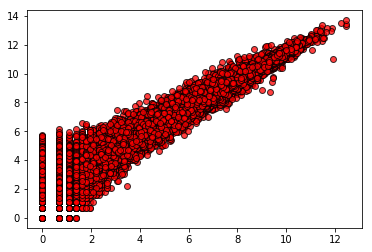

In [323]:
plt.scatter(log_retweets, log_favorites, marker="o", facecolors="red", edgecolors="black",
             alpha=0.75)

In [320]:

# List of values from 0 to 100 each value being 1 greater than the last
x_axis_2 = np.arange(0, np.max(retweets), 1)

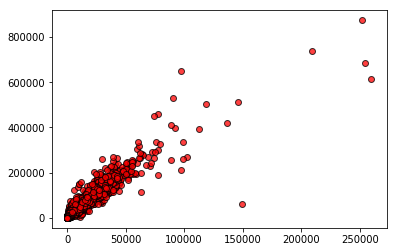

In [322]:
plt.scatter(retweets, favorites, marker="o", facecolors="red", edgecolors="black",
             alpha=0.75)

In [257]:
today_datetime = dt.datetime.utcnow()
today_date = today_datetime.date()
thirty_days_ago = dt.date.today() - dt.timedelta(days = 30)

session = Session(engine)

# Select first candidate from "candidates_list" for displaying initial tweets
tweet_list = []
init_user_name = candidates_list[0]["name"]
init_user_id = candidates_list[0]["twitter_user_id"]
# Create query, initial metric is retweets
tweet_query = session.query(Tweets.user_name, Tweets.tweet_id_str).\
    filter(Tweets.created_at_date >= thirty_days_ago).\
    filter(Tweets.created_at_date <= today_date).\
    filter(Tweets.user_id_str == init_user_id).\
    order_by(Tweets.retweet_count.desc()).limit(10).all()
keys = ("user_name", "tweet_id_str")

for tweet in tweet_query:
    tweet_dict = dict(zip(keys, tweet))
    tweet_list.append(tweet_dict)

In [258]:
tweet_list

[{'user_name': 'Joe Biden', 'tweet_id_str': '1155176535428460545'},
 {'user_name': 'Joe Biden', 'tweet_id_str': '1158151124991401985'},
 {'user_name': 'Joe Biden', 'tweet_id_str': '1159275282483810305'},
 {'user_name': 'Joe Biden', 'tweet_id_str': '1159286969693802496'},
 {'user_name': 'Joe Biden', 'tweet_id_str': '1159188880983240710'},
 {'user_name': 'Joe Biden', 'tweet_id_str': '1157763319429656577'},
 {'user_name': 'Joe Biden', 'tweet_id_str': '1150146631569989633'},
 {'user_name': 'Joe Biden', 'tweet_id_str': '1157397408533360645'},
 {'user_name': 'Joe Biden', 'tweet_id_str': '1159209632600154113'},
 {'user_name': 'Joe Biden', 'tweet_id_str': '1158410845854081025'}]

In [255]:
box_query

[('Joe Biden', '1155176535428460545'),
 ('Joe Biden', '1158151124991401985'),
 ('Joe Biden', '1159275282483810305'),
 ('Joe Biden', '1159286969693802496'),
 ('Joe Biden', '1159188880983240710'),
 ('Joe Biden', '1157763319429656577'),
 ('Joe Biden', '1150146631569989633'),
 ('Joe Biden', '1157397408533360645'),
 ('Joe Biden', '1159209632600154113'),
 ('Joe Biden', '1158410845854081025')]

In [199]:
a = [0,1,1,2,3,5,8,13,21,34,55]

In [207]:
np.quantile(a, .75, interpolation = "nearest")

21

In [219]:
def user_sort(query):
    index_select = query[1]
    return index_select



# Initiate "histogram" graph from current date to 30 days prior
today_datetime = dt.datetime.utcnow()
today_date = today_datetime.date()
thirty_days_ago = dt.date.today() - dt.timedelta(days = 30)

session = Session(engine)

box_query = session.query(Tweets.user_name, Tweets.user_id_str, Tweets.retweet_count).\
    filter(Tweets.created_at_date >= thirty_days_ago).\
    filter(Tweets.created_at_date <= today_date)

# [box_query] = list(zip(*box_query))

box_sorted = sorted(box_query, key = user_sort)

for k, g in groupby(box_sorted, key = user_sort):
    current_list = list(g)
    retweet_list = list(map(lambda x: x[2], current_list))
#     retweet_median = np.median(retweet_list)
#     retweet_q1 = np.quantile(retweet_list, .25, interpolation = "nearest")
#     retweet_q3 = np.quantile(retweet_list, .75, interpolation = "nearest")
#     retweet_min = np.min(retweet_list)
#     retweet_max = np.max(retweet_list)
#     user_id = k
#     [user_dict] = list(filter(lambda x: x["twitter_user_id"] == user_id, candidates_list))
#     user_name = user_dict["name"]  
    print(retweet_list)

# print(box_sorted)



[5, 7, 3, 21, 18, 20, 20, 1, 1, 18, 26, 11, 74, 25, 31, 12, 56, 47, 17, 13, 11, 5, 10, 13, 29, 26, 12, 16, 19, 6, 22, 23, 31, 18, 22, 17, 12, 126, 41, 25, 28, 15, 22, 5, 2, 6, 16, 10, 13, 51, 27, 5, 5, 9, 5, 17, 6, 32, 22, 23, 23, 9, 28, 29, 24, 16, 28, 26, 42, 43, 25, 33, 11, 9, 17, 16, 20, 9, 35, 8, 32, 38, 29, 69, 36, 37, 22, 33, 26, 21, 37, 26, 75, 33, 8, 27, 9, 28, 25, 22, 16, 516, 31, 25, 21, 22, 11, 13, 125, 17, 15, 9, 68, 13, 48, 7, 29, 6, 30, 17, 9, 14, 19, 18, 12, 21, 33, 19, 19, 9, 12, 15, 8, 19, 8, 6, 15, 33, 67, 2, 10, 35, 38, 55, 7, 9, 4, 10, 10, 11, 25, 24, 14, 21, 8, 8, 25, 6, 21, 7, 7, 33, 10, 2, 4, 3, 1, 40, 7, 25, 10, 16, 6, 2, 4, 7, 100, 27, 11, 17, 18, 7, 8, 70, 17, 10, 55, 26, 38, 14, 15, 26, 102, 31, 20, 15, 7, 11, 6, 13, 21, 18, 30, 15, 16, 8, 12, 15, 54, 5, 14, 12, 9, 44, 9, 60, 1, 15, 8, 7, 50, 13, 12, 123, 23, 27, 38, 35, 9, 21, 23, 43, 12, 6, 15, 5, 16, 9, 13, 47, 27, 31, 78, 13, 6, 19, 75, 4, 9, 5, 5, 5, 30, 29, 8, 34, 10, 19, 22, 11, 3, 15, 30, 4, 15, 58, 

In [239]:
def transform(item):
    item_list = list(item)
    index_select = item[2]
    if index_select == 0:
        index_select = 1
        item_list.pop(0)
        item_list.append(index_select)
        return item_list
    else:
        return item_list

In [245]:
for k, g in groupby(box_sorted, key = user_sort):
    current_list = list(g)
#     print(current_list)
    new_list = list(map(lambda x: transform(x), current_list))
#     print(new_list)
#     print(list(map(lambda x: x[2], new_list)))
#     log_list = list(np.log(new_list))
#     print(log_list)
    retweet_list = list(map(lambda x: x[2], new_list))
    log_list = list(np.log(retweet_list))
    print(log_list)
#     retweet_median = np.median(retweet_list)
#     retweet_q1 = np.quantile(retweet_list, .25, interpolation = "nearest")
#     retweet_q3 = np.quantile(retweet_list, .75, interpolation = "nearest")
#     retweet_min = np.min(retweet_list)
#     retweet_max = np.max(retweet_list)
#     user_id = k
#     [user_dict] = list(filter(lambda x: x["twitter_user_id"] == user_id, candidates_list))
#     user_name = user_dict["name"]  
#     print(user_name)

[1.6094379124341003, 1.9459101490553132, 1.0986122886681098, 3.044522437723423, 2.8903717578961645, 2.995732273553991, 2.995732273553991, 0.0, 0.0, 2.8903717578961645, 3.258096538021482, 2.3978952727983707, 4.30406509320417, 3.2188758248682006, 3.4339872044851463, 2.4849066497880004, 4.02535169073515, 3.8501476017100584, 2.833213344056216, 2.5649493574615367, 2.3978952727983707, 1.6094379124341003, 2.302585092994046, 2.5649493574615367, 3.367295829986474, 3.258096538021482, 2.4849066497880004, 2.772588722239781, 2.9444389791664403, 1.791759469228055, 3.091042453358316, 3.1354942159291497, 3.4339872044851463, 2.8903717578961645, 3.091042453358316, 2.833213344056216, 2.4849066497880004, 4.836281906951478, 3.713572066704308, 3.2188758248682006, 3.332204510175204, 2.70805020110221, 3.091042453358316, 1.6094379124341003, 0.6931471805599453, 1.791759469228055, 2.772588722239781, 2.302585092994046, 2.5649493574615367, 3.9318256327243257, 3.295836866004329, 1.6094379124341003, 1.60943791243410

In [141]:
variable = "retweet_count"

In [144]:
begin_date = dt.date(2019, 7, 1)
end_date = dt.date(2019, 7, 30)

In [166]:
histogram_query = session.query(Tweets.created_at_date).\
    filter(Tweets.created_at_date >= begin_date).\
    filter(Tweets.created_at_date <= end_date)

[histogram_query] = list((zip(*histogram_query)))

In [220]:
b = [0,0,0,0]
np.log(b)

C:\Users\lande\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


array([-inf, -inf, -inf, -inf])

In [167]:
list(histogram_query)
# for x in histogram_query:
#     print(x)

[datetime.date(2019, 7, 30),
 datetime.date(2019, 7, 30),
 datetime.date(2019, 7, 30),
 datetime.date(2019, 7, 30),
 datetime.date(2019, 7, 30),
 datetime.date(2019, 7, 30),
 datetime.date(2019, 7, 29),
 datetime.date(2019, 7, 29),
 datetime.date(2019, 7, 29),
 datetime.date(2019, 7, 29),
 datetime.date(2019, 7, 29),
 datetime.date(2019, 7, 29),
 datetime.date(2019, 7, 28),
 datetime.date(2019, 7, 28),
 datetime.date(2019, 7, 28),
 datetime.date(2019, 7, 28),
 datetime.date(2019, 7, 28),
 datetime.date(2019, 7, 28),
 datetime.date(2019, 7, 27),
 datetime.date(2019, 7, 27),
 datetime.date(2019, 7, 27),
 datetime.date(2019, 7, 27),
 datetime.date(2019, 7, 27),
 datetime.date(2019, 7, 27),
 datetime.date(2019, 7, 27),
 datetime.date(2019, 7, 27),
 datetime.date(2019, 7, 27),
 datetime.date(2019, 7, 27),
 datetime.date(2019, 7, 26),
 datetime.date(2019, 7, 26),
 datetime.date(2019, 7, 26),
 datetime.date(2019, 7, 26),
 datetime.date(2019, 7, 26),
 datetime.date(2019, 7, 26),
 datetime.date

In [169]:
def day_sort(query):
    return(query)

In [170]:
sorted(histogram_query, key = day_sort)

[datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019, 7, 1),
 datetime.date(2019,

In [172]:
from itertools import groupby

In [173]:
sorted_query = sorted(histogram_query, key = day_sort)

group_list = []

keys = ("day", "count")

for k, g in groupby(sorted_query, key = day_sort):
    current_list = list(g)
    count = len(current_list)
    group_tuple = (k, count)
    group_dict = dict(zip(keys, group_tuple))
    group_list.append(group_dict)

In [174]:
group_list

[{'day': datetime.date(2019, 7, 1), 'count': 209},
 {'day': datetime.date(2019, 7, 2), 'count': 211},
 {'day': datetime.date(2019, 7, 3), 'count': 217},
 {'day': datetime.date(2019, 7, 4), 'count': 194},
 {'day': datetime.date(2019, 7, 5), 'count': 187},
 {'day': datetime.date(2019, 7, 6), 'count': 204},
 {'day': datetime.date(2019, 7, 7), 'count': 199},
 {'day': datetime.date(2019, 7, 8), 'count': 264},
 {'day': datetime.date(2019, 7, 9), 'count': 244},
 {'day': datetime.date(2019, 7, 10), 'count': 254},
 {'day': datetime.date(2019, 7, 11), 'count': 302},
 {'day': datetime.date(2019, 7, 12), 'count': 268},
 {'day': datetime.date(2019, 7, 13), 'count': 200},
 {'day': datetime.date(2019, 7, 14), 'count': 176},
 {'day': datetime.date(2019, 7, 15), 'count': 204},
 {'day': datetime.date(2019, 7, 16), 'count': 222},
 {'day': datetime.date(2019, 7, 17), 'count': 221},
 {'day': datetime.date(2019, 7, 18), 'count': 254},
 {'day': datetime.date(2019, 7, 19), 'count': 260},
 {'day': datetime.dat

In [142]:
query = session.query(Tweets.retweet_count).\
    filter(Tweets.created_at_date >= dt.date(2019, 7, 1)).\
    filter(Tweets.created_at_date <= dt.date(2019,7, 30)).\
    order_by(Tweets[variable])

TypeError: 'DeclarativeMeta' object is not subscriptable

In [25]:
query

In [26]:
for x in query:
    print (x)

(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)
(1,)


(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(11,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(13,)
(14,)
(14,)
(14,)
(14,)
(14,)
(14,)
(14,)
(14,)
(14,

(695,)
(696,)
(696,)
(696,)
(698,)
(701,)
(701,)
(703,)
(703,)
(705,)
(705,)
(705,)
(705,)
(706,)
(706,)
(707,)
(707,)
(709,)
(710,)
(710,)
(711,)
(711,)
(713,)
(714,)
(714,)
(714,)
(714,)
(715,)
(716,)
(717,)
(718,)
(719,)
(721,)
(721,)
(722,)
(723,)
(723,)
(725,)
(726,)
(726,)
(727,)
(727,)
(728,)
(730,)
(731,)
(731,)
(733,)
(733,)
(736,)
(737,)
(737,)
(738,)
(740,)
(741,)
(741,)
(742,)
(742,)
(744,)
(746,)
(747,)
(747,)
(749,)
(750,)
(750,)
(751,)
(752,)
(754,)
(754,)
(754,)
(757,)
(759,)
(760,)
(761,)
(762,)
(762,)
(763,)
(764,)
(765,)
(768,)
(768,)
(769,)
(771,)
(774,)
(774,)
(775,)
(777,)
(778,)
(778,)
(778,)
(778,)
(783,)
(784,)
(786,)
(786,)
(788,)
(791,)
(791,)
(792,)
(792,)
(793,)
(793,)
(793,)
(795,)
(795,)
(796,)
(797,)
(799,)
(799,)
(800,)
(800,)
(802,)
(805,)
(806,)
(807,)
(807,)
(810,)
(810,)
(811,)
(813,)
(814,)
(815,)
(817,)
(817,)
(818,)
(819,)
(821,)
(821,)
(821,)
(824,)
(825,)
(827,)
(828,)
(829,)
(829,)
(829,)
(832,)
(832,)
(832,)
(835,)
(835,)
(836,)
(836,)
(840,)

In [27]:
query_iter = iter(query)

In [23]:
next(query_iter)

(209292)

In [ ]:
n = 5
freq = [0 for i in range(n - 1 + 1)] 

In [ ]:
freq

In [ ]:
[a_tuple] = list(zip(*query))

In [ ]:
def findFrequencyUtil(arr, low, high, freq): 
      
    # If element at index low is equal to element  
    # at index high in the array 
    if (arr[low] == arr[high]): 
          
        # increment the frequency of the element 
        # by count of elements between high and low 
        freq[arr[low]] += high - low + 1
      
    else: 
          
        # Find mid and recurse for left   
        # and right subarray 
        mid = int((low + high) / 2) 
        findFrequencyUtil(arr, low, mid, freq) 
        findFrequencyUtil(arr, mid + 1, high, freq) 
      
# A wrapper over recursive function  
# findFrequencyUtil(). It print number of  
# occurrences of each element in the array. 
def findFrequency(arr, n): 
      
    # create a empty vector to store frequencies 
    # and initialize it by 0. Size of vector is  
    # maximum value (which is last value in sorted 
    # array) plus 1. 
    freq = [0 for i in range(n - 1 + 1)] 
      
    # Fill the vector with frequency 
    findFrequencyUtil(arr, 0, n - 1, freq) 
  
    # Print the frequencies
    print(freq)
    for i in range(0, arr[n - 1] + 1, 1): 
        if (freq[i] != 0): 
            print("Element", i, "occurs",  
                        freq[i], "times") 

In [ ]:
arr = [1, 1, 1, 2, 3, 3, 5, 
       5, 8, 8, 8, 9, 9, 10] 
n = len(arr) 
findFrequency(arr, n)

In [ ]:
[a_tuple] = list(zip(*query))

In [ ]:
a_tuple

In [ ]:
today_datetime = dt.datetime.utcnow()
today_date = today_datetime.date()
thirty_days_ago = dt.date.today() - dt.timedelta(days = 30)

In [ ]:
histogram_query = session.query(Tweets.retweet_count).\
    filter(Tweets.created_at_date >= thirty_days_ago).\
    filter(Tweets.created_at_date <= today_date).all()

range_query = list(
    session.query(func.max(Tweets.retweet_count),
    func.min(Tweets.retweet_count)).\
    filter(Tweets.created_at_date >=thirty_days_ago).\
    filter(Tweets.created_at_date <= today_date).first()
)


In [ ]:
range_query

In [ ]:
range_query = tuple(range_query)

In [ ]:
range_query

In [ ]:
x = (2, 5)
print((x + 3))

In [ ]:
range_query[0] = range_query[0] + 1

In [ ]:
range_query

In [ ]:
histogram_query[0]

In [ ]:
histogram_query = session.query(Tweets.retweet_count).\
    filter(Tweets.created_at_date >= thirty_days_ago).\
    filter(Tweets.created_at_date <= today_date).\
    order_by(Tweets.retweet_count).all()

In [138]:
# Initiate "histogram" graph from current date to 30 days prior
today_datetime = dt.datetime.utcnow()
today_date = today_datetime.date()
thirty_days_ago = dt.date.today() - dt.timedelta(days = 30)

session = Session(engine)

histogram_query = session.query(Tweets.retweet_count).\
    filter(Tweets.created_at_date >= thirty_days_ago).\
    filter(Tweets.created_at_date <= today_date).\
    order_by(Tweets.retweet_count)
# Query returned into a list of separate tuples, below combines all tuples into one
[histogram_query] = list(zip(*histogram_query))

query_iter = iter(histogram_query)

#Find min and max values
range_query = session.query(func.min(Tweets.retweet_count),
    func.max(Tweets.retweet_count)).\
    filter(Tweets.created_at_date >=thirty_days_ago).\
    filter(Tweets.created_at_date <= today_date).first()

min_value = range_query[0]
max_value = range_query[1]
# Find range
histogram_range = max_value - min_value

#Define # of histogram bars (100)
histogram_bars = 100

# Find range for each bar
bar_range = histogram_range / histogram_bars

histogram_list = []

for x in range(0, histogram_bars):
    begin_value = min_value + x * bar_range
    end_value = begin_value + bar_range
    begin_str = "{:,}".format(round(begin_value, 2))
    end_str = "{:,}".format(round(end_value, 2))
    range_str = begin_str + "-" + end_str
    hist_dict = {
        'begin': begin_value,
        'end': end_value,
        'tick': range_str,
        'count': 0
    }
    histogram_list.append(hist_dict)

for y in query_iter:
    try:
        [current_bar] = list(filter(lambda x: y >= x["begin"] and y < x["end"], histogram_list))
        current_bar["count"] += 1
    except ValueError:
        histogram_list[-1]["count"] += 1
    


In [139]:
histogram_list

[{'begin': 0.0, 'end': 2522.09, 'tick': '0.0-2,522.09', 'count': 6463},
 {'begin': 2522.09, 'end': 5044.18, 'tick': '2,522.09-5,044.18', 'count': 221},
 {'begin': 5044.18, 'end': 7566.27, 'tick': '5,044.18-7,566.27', 'count': 85},
 {'begin': 7566.27,
  'end': 10088.36,
  'tick': '7,566.27-10,088.36',
  'count': 70},
 {'begin': 10088.36,
  'end': 12610.45,
  'tick': '10,088.36-12,610.45',
  'count': 66},
 {'begin': 12610.45,
  'end': 15132.54,
  'tick': '12,610.45-15,132.54',
  'count': 74},
 {'begin': 15132.54,
  'end': 17654.63,
  'tick': '15,132.54-17,654.63',
  'count': 74},
 {'begin': 17654.63,
  'end': 20176.72,
  'tick': '17,654.63-20,176.72',
  'count': 60},
 {'begin': 20176.72,
  'end': 22698.81,
  'tick': '20,176.72-22,698.81',
  'count': 46},
 {'begin': 22698.81,
  'end': 25220.9,
  'tick': '22,698.81-25,220.9',
  'count': 40},
 {'begin': 25220.9,
  'end': 27742.99,
  'tick': '25,220.9-27,742.99',
  'count': 29},
 {'begin': 27742.99,
  'end': 30265.08,
  'tick': '27,742.99-30

In [76]:
current_value = next(query_iter)

In [77]:
current_value

209292

In [96]:
for x in query_iter:
    print(x)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


253
253
253
253
254
254
254
254
254
254
255
255
255
255
255
256
256
256
256
256
256
256
257
257
257
257
257
258
258
258
259
259
259
260
260
260
261
261
261
261
261
261
262
262
262
262
263
263
263
263
263
264
264
264
264
264
264
264
265
265
265
265
266
266
266
266
266
266
267
267
268
268
268
268
269
269
270
270
270
270
271
271
271
271
271
271
272
272
272
273
273
273
274
274
274
274
274
274
275
275
275
275
276
276
276
277
277
278
279
279
279
279
280
280
280
280
281
281
281
281
281
281
281
282
282
282
283
283
283
285
285
285
285
285
286
286
286
286
287
287
287
287
289
290
290
290
290
290
291
291
291
291
291
292
294
294
295
295
295
296
296
296
296
296
297
297
297
297
298
298
299
299
299
299
300
300
301
301
301
301
301
301
302
302
303
303
303
303
304
305
305
305
305
305
306
306
307
307
307
307
307
308
308
308
308
310
310
310
311
312
312
312
312
313
313
313
313
313
313
314
314
314
315
315
315
316
316
316
316
316
317
317
317
318
318
319
320
320
320
320
320
320
321
321
321
322
322
322
322
323


3462
3465
3498
3509
3529
3530
3532
3535
3539
3568
3581
3585
3601
3602
3609
3614
3633
3640
3668
3668
3693
3711
3724
3732
3742
3746
3747
3749
3763
3774
3786
3788
3790
3791
3805
3816
3817
3826
3841
3842
3884
3891
3937
3941
3946
3958
3961
3967
3984
4007
4011
4030
4032
4041
4054
4083
4086
4089
4098
4110
4141
4141
4146
4184
4190
4195
4197
4248
4248
4264
4309
4362
4367
4367
4371
4372
4375
4388
4388
4406
4407
4410
4417
4519
4522
4527
4544
4577
4620
4644
4681
4687
4700
4750
4770
4783
4791
4796
4907
4940
4960
4960
4970
4973
4976
4994
5009
5037
5047
5094
5122
5161
5168
5175
5176
5207
5237
5254
5283
5286
5301
5349
5384
5398
5548
5552
5583
5634
5640
5677
5681
5686
5711
5754
5792
5793
5793
5794
5834
5866
5900
5956
5995
6001
6024
6115
6190
6228
6264
6296
6306
6310
6315
6320
6331
6342
6367
6376
6377
6411
6456
6522
6537
6538
6575
6657
6682
6698
6754
6772
6791
6840
6895
6912
7001
7064
7141
7162
7172
7191
7202
7284
7286
7293
7299
7331
7333
7347
7355
7412
7456
7482
7546
7574
7578
7626
7631
7695
7727
7732


In [ ]:
# for x in range(0, histogram_bars):
#     print(x)

In [ ]:
for x in range()

In [ ]:
def sort_query(query):
    

In [82]:
len(histogram_query)

7313

In [ ]:
for x in range(0, histogram_bars):
    begin_value = (x) * bar_range + min_value
    end_value = begin_value + bar_range

    begin_str = str(round(begin_value, 2))
    end_str = str(round(end_value, 2))

    range_str = begin_str + "-" + end_str
    print(begin_value)
    print(end_value)

In [124]:
query_iter = iter(histogram_query)

In [123]:
[q] = list(filter(lambda x: 1000000 < x["begin"], histogram_list))

ValueError: not enough values to unpack (expected 1, got 0)

In [122]:
q is None

False

In [136]:

    
# while True:
    
#     begin_str = "{:,}".format(round(begin_value, 2))
#     end_str = "{:,}".format(round(end_value, 2))

#     range_str = begin_str + "-" + end_str
    
    
# #     histogram_list.append(hist_dict)

# #     try:
# #         current_value = next(query_iter)
# #     except StopIteration:
# #         break

# #     for value in histogram_query:

#     for x in query_iter:
#         if current_value < end_value:
#             hist_dict[range_str] += 1
#         if current_value >= end_value:
            
#             histogram_list.append(hist_dict)
        
#             begin_value = begin_value + bar_range
#             end_value = end_value + bar_range
            

#     if current_value < end_value:
        
#         hist_dict[range_str] += 1
        
#     if current_value >= end_value:
        
#         histogram_list.append(hist_dict)
        
#         begin_value = begin_value + bar_range
#         end_value = end_value + bar_range

#         if end_value == max_value:
#             end_value += 1

#         begin_str = "{:,}".format(round(begin_value, 2))
#         end_str = "{:,}".format(round(end_value, 2))

#         range_str = begin_str + "-" + end_str

# #         frequency_count = 0

# #         if current_value >= end_value:

                
                
                

#     else:
#         frequency_count += 1
    

In [137]:
histogram_list

[{'begin': 0.0, 'end': 2522.09, 'tick': '0.0-2,522.09', 'count': 6463},
 {'begin': 2522.09, 'end': 5044.18, 'tick': '2,522.09-5,044.18', 'count': 221},
 {'begin': 5044.18, 'end': 7566.27, 'tick': '5,044.18-7,566.27', 'count': 85},
 {'begin': 7566.27,
  'end': 10088.36,
  'tick': '7,566.27-10,088.36',
  'count': 70},
 {'begin': 10088.36,
  'end': 12610.45,
  'tick': '10,088.36-12,610.45',
  'count': 66},
 {'begin': 12610.45,
  'end': 15132.54,
  'tick': '12,610.45-15,132.54',
  'count': 74},
 {'begin': 15132.54,
  'end': 17654.63,
  'tick': '15,132.54-17,654.63',
  'count': 74},
 {'begin': 17654.63,
  'end': 20176.72,
  'tick': '17,654.63-20,176.72',
  'count': 60},
 {'begin': 20176.72,
  'end': 22698.81,
  'tick': '20,176.72-22,698.81',
  'count': 46},
 {'begin': 22698.81,
  'end': 25220.9,
  'tick': '22,698.81-25,220.9',
  'count': 40},
 {'begin': 25220.9,
  'end': 27742.99,
  'tick': '25,220.9-27,742.99',
  'count': 29},
 {'begin': 27742.99,
  'end': 30265.08,
  'tick': '27,742.99-30

In [98]:
for x in range(0, histogram_bars):
    begin_value = min_value + x * bar_range
    end_value = begin_value + bar_range
    range_str = begin_str + "-" + end_str
    hist_dict = {
        begin: begin_value,
        end: end_value,
        tick: range_str
    }
    histogram_list.append(hist_dict)

NameError: name 'begin' is not defined

In [94]:
def find_frequency(begin_value, end_value, max_value, bar_range):
    begin_value = begin_value + bar_range
    end_value = end_value + bar_range

    if end_value == max_value:
        end_value += 1

SyntaxError: unexpected EOF while parsing (<ipython-input-94-ece79e57c656>, line 1)

In [81]:
histogram_list

[{'0-2,522.09': 6463},
 {'2,522.09-5,044.18': 220},
 {'5,044.18-7,566.27': 84},
 {'7,566.27-10,088.36': 69},
 {'10,088.36-12,610.45': 65},
 {'12,610.45-15,132.54': 73},
 {'15,132.54-17,654.63': 73},
 {'17,654.63-20,176.72': 59},
 {'20,176.72-22,698.81': 45},
 {'22,698.81-25,220.9': 39},
 {'25,220.9-27,742.99': 28},
 {'27,742.99-30,265.08': 18},
 {'30,265.08-32,787.17': 21},
 {'32,787.17-35,309.26': 7},
 {'35,309.26-37,831.35': 8},
 {'37,831.35-40,353.44': 4},
 {'40,353.44-42,875.53': 5},
 {'42,875.53-45,397.62': 2},
 {'45,397.62-47,919.71': 1},
 {'47,919.71-50,441.8': 2},
 {'50,441.8-52,963.89': 0},
 {'52,963.89-55,485.98': 0},
 {'55,485.98-58,008.07': 0},
 {'58,008.07-60,530.16': 0},
 {'60,530.16-63,052.25': 0},
 {'63,052.25-65,574.34': 0},
 {'65,574.34-68,096.43': 0}]

In [85]:
hist_dict = {
    "count": 0,
    "name": 'Ed'
}

In [86]:
hist_dict["count"] += 1

In [89]:
hist_dict

{'count': 1, 'name': 'Ed'}

In [48]:
"{:,}".format(12610.45)

'12,610.45'

In [93]:
for x in range(0, 100):
    iteration = True
    i = 0
    print(f"iteration {x}")
    iteration = False
    while iteration == True:
        print("Yeah")
        i += 1
        print(i)
        if i  > 20:
            break

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration

In [36]:
frequency_count = 1

for x in range(0, 20):
    print(frequency_count)
    frequency_count += 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [ ]:
histogram_list = []

for x in range(0, histogram_bars):
    begin_value = min_value + x * bar_range
    end_value = begin_value + bar_range

    begin_str = str(round(begin_value, 2))
    end_str = str(round(end_value, 2))

    range_str = begin_str + "-" + end_str

    frequency_count = 0

    for y in range(0, len(histogram_query)):
        current_value = histogram_query[y]
        if (current_value >= begin_value) and (current_value < end_value):
            print("within range")
            frequency_count = frequency_count + 1
            histogram_query.pop(y)
        else:
            print("out of range")
    frequency_dict = {
        range_str: frequency_count
    }

    histogram_list.append(frequency_dict)

In [ ]:
# A Python program to generate squares from 1 
# to 100 using yield and therefore generator 
  
# An infinite generator function that prints 
# next square number. It starts with 1 
def nextSquare(): 
    i = 1;
  
    # An Infinite loop to generate squares  
    while True: 
        if i < 5:

            yield i*i                 
            i += 1  # Next execution resumes  
                    # from this point      
        else:
            return 10
  
# Driver code to test above generator  
# function 
for num in nextSquare(): 
    if num > 100: 
         break    
    print(num)

In [ ]:
def next_item()
    i = 0
    
    while True:
        

In [ ]:
nextSquare()

In [ ]:
for num in nextSquare(): 
    if num > 100: 
         break    
    print(num)

In [ ]:
a_list.pop(2, 3)

In [ ]:
a_list

In [ ]:
a_list[3]

In [ ]:
histogram_list

In [ ]:
help(session.query().order_by())

In [ ]:
date_one = "January 20, 2017"
date_one_datetime = dt.datetime.strptime(date_one, "%B %d, %Y")
date_one_date = date_one_datetime.date()
date_one_date

In [ ]:
date_two_date = dt.date(2019, 1, 5)
date_two_date

In [ ]:
date_two_date <= date_one_date

In [ ]:
max_date = session.query(func.max(Tweets.created_at_date)).\
    filter(Tweets.user_id_str == "26637348").first()

In [ ]:
max_date = max_date[0]

In [ ]:
max_date

In [ ]:
max_date + dt.timedelta(days = 1)

In [ ]:
candidate_name = list(filter(lambda x: (x["twitter_user_id"] == "26637348"), candidates_list))

In [ ]:
for x in candidate_name:
    print(x)

In [ ]:
candidate_name

In [ ]:
candidate_name["name"]

In [ ]:
tulsi = session.query(Tweets.user_name,
                     Tweets.retweet_count,
                     Tweets.favorite_count,
                     Tweets.created_at_datetime).filter(Tweets.user_id_str == "26637348")

In [ ]:
time_basis = "Day"

In [ ]:
tulsi

In [ ]:
type(tulsi)

In [ ]:
type(tulsi[0][1])

In [ ]:
type(convert_time(tulsi[0]))

In [ ]:
convert_time(tulsi[0])

In [ ]:
tulsi_sorted = sorted(tulsi, key = lambda query: convert_time(query, time_basis))

In [ ]:
type(tulsi_sorted)

In [ ]:
tulsi_sorted

In [ ]:
def convert_time(time, basis):
    index_object = time[3]
    if basis == "Day":
        weekday = dt.datetime.strftime(index_object, "%w")
    #     weekday = int(weekday)
    #     print(weekday)
        return weekday
    elif basis == "Hour":
        hour = dt.datetime.strftime(index_object, "%H")
        return hour

In [ ]:
for x in tulsi_sorted:
    time_converted = convert_time(x)
    print(time_converted)
    print(type(time_converted))
#     print(x)

In [ ]:
from itertools import groupby

In [ ]:
groups = []
uniquekeys = []

In [ ]:
from numpy import mean  # or write your own mean function
tuple(map(mean, zip(*x)))
# (2.0, 3.0, 4.0)

In [ ]:
for k, g in groupby(tulsi_sorted, convert_time):
    g_list = list(g)
    tuple(map(lambda x: x[2:3]))
    

In [ ]:
for k, g in groupby(tulsi_sorted, convert_time):
    print(list(g)[2])

In [ ]:
time_list = []
keys = ("user_name", "retweet_average", "favorite_average", "hour")

init_user_name = "Tulsi"
for k, g in groupby(tulsi_sorted, key = lambda row: convert_time(row, time_basis)):
    current_list = list(g)
    group_retweet_list = list(map(lambda x: x[1], current_list))
    group_retweet_average = np.mean(group_retweet_list)
    group_favorite_list = list(map(lambda x: x[2], current_list))
    group_favorite_average = np.mean(group_favorite_list)
    group_tuple = (init_user_name, group_favorite_average, group_favorite_average, k)
    group_dict = dict(zip(keys, group_tuple))
    time_list.append(group_dict)

In [ ]:
time_list

In [ ]:
groupby(tulsi_sorted, convert_time)

In [ ]:
for k, g in groupby(tulsi_sorted, key = lambda row: convert_time(row, time_basis)):
    groups.append(list(g))      # Store group iterator as a list
    uniquekeys.append(k)

In [ ]:
some_list = [0, 1, 2, 3]
some_list[4]

In [ ]:
groups

In [ ]:
for x in groups[3]:
    time_converted = convert_time(x)
    print(time_converted)

In [ ]:
uniquekeys

In [ ]:
groups = []
uniquekeys = []
data = sorted(data, key=keyfunc)
for k, g in groupby(data, keyfunc):
    groups.append(list(g))      # Store group iterator as a list
    uniquekeys.append(k)

In [ ]:
convert_time[tulsi_sorted[0][1]]

In [ ]:
y = (0, 3)
x = y[1]
print(x)

In [ ]:
candidate_two_id = ["26637348", "30354991"]

In [ ]:
session.query(Tweets.user_name, func.avg(Tweets.retweet_count)).\
        filter(Tweets.user_id_str == "26637348").\
        filter(Tweets.created_at_date < dt.date(2019, 7, 7)).\
        filter(Tweets.created_at_date > dt.date(2019, 6, 30)).first()


In [ ]:
print(session.query(Tweets.user_name, func.count(Tweets.user_name)).group_by(Tweets.user_name).all())

In [ ]:
print(session.query(Tweets.full_text).limit(50).all())

In [ ]:
today_date = dt.date.today()
thirty_days_ago = dt.date.today() - dt.timedelta(days = 30)

time_delta = today_date - thirty_days_ago + dt.timedelta(days = 1)
days_back = dt.timedelta(days = 10)

session = Session(engine)

moving_average_list = []

# for candidate in candidates_list:

#     for days in range(0, time_delta.days):

# current_date = thirty_days_ago + dt.timedelta(days= days)

# current_date_str = dt.date.strftime(current_date, "%Y-%m-%d")

moving_average_query = session.query(Tweets.user_name, Tweets.created_at, func.avg(Tweets.retweet_count)).\
    filter(Tweets.user_id_str == "2228878592").\
    filter(Tweets.created_at_date > (thirty_days_ago - days_back)).\
    filter(Tweets.created_at_date <= today_date)

moving_average_query

In [ ]:
sub_query = moving_average_query.filter(Tweets.created_at_date > (today_date - days_back)).\
    filter(Tweets.created_at_date < today_date).all()
sub_query

In [ ]:
moving_average_query.all()

In [ ]:
print(thirty_days_ago)
print(thirty_days_ago + dt.timedelta(days=1))

In [ ]:
a_query = session.query(Tweets.user_name, Tweets.retweet_count, Tweets.favorite_count).first()
a_query

In [ ]:
keys = ("user", "retweet_count", "favorite_count")

a_dict = dict(zip(keys, a_query))
a_dict

In [ ]:
date_1 = dt.date(2019, 7, 30)
date_2 = dt.date(2019, 7, 1)
datetime_1 = dt.datetime(2019, 7, 30, 5)

In [ ]:
date_1 - date_2

In [ ]:
two_hundred = dt.timedelta(days = 200)
now = dt.date(2019,7,31)
now-two_hundred

In [ ]:
time_delta = date_1 - date_2
type(time_delta.days)

In [ ]:
today_date = dt.date.today()
thirty_days_ago = dt.date.today() - dt.timedelta(days = 30)

time_delta = today_date - thirty_days_ago + dt.timedelta(days = 1)
print(thirty_days_ago)
time_delta

In [ ]:
some_tuple = (1, 2, 3)
some_tuple[1]

In [ ]:
some_query = session.query(Tweets.full_text, Tweets.created_at).filter(Tweets.user_id == 25073877).first()
some_query

In [ ]:
session.query(func.avg(Tweets.retweet_count)).all()

In [ ]:
session.query(Tweets.retweet_count).percentile_cont(0.5)

In [ ]:
help(func)

In [ ]:
candidate_ids = ['939091', '15808765', '19682187', '426028646']
# candidate_set = set(candidate_ids)

In [ ]:
some_date = "2019-07-12"

In [ ]:
short_date = some_date[4:]
short_date

In [ ]:
format_date = func.strftime("%Y", some_date)
format_date

In [ ]:
cut_date = func.strptime("%Y-%m-%d", some_date)


In [ ]:
def convert(date_string):
#     datetime_object = date_string[-4:] + "-" + dt.datetime.strftime(dt.datetime.strptime(date_string[4:7], "%b"), "%m") + \
#         "-" + date_string[8:10]
    datetime_object = dt.datetime.strptime(date_string, "%a %b %d %H:%M:%S %z %Y")
    print(datetime_object)
    print(type(datetime_object))
    datetime_string = dt.datetime.strftime(datetime_object, "%Y-%m-%d")
    print(datetime_string)
    return datetime_string

In [ ]:
sample_string = 'Thu Jul 25 01:40:00 +0000 2019'

In [ ]:
for x in range(0,10):
    print(x)

In [ ]:
convert(sample_string)

In [ ]:
another_query = session.query(func.strptime())

In [ ]:
cut_date = "2019-07-29"
cut_datetime = dt.datetime.strptime(cut_date, "%Y-%m-%d")
cut_datetime

In [ ]:
simple_query = session.query(Tweets.user_name, func.avg(Tweets.retweet_count)).\
    filter(Tweets.created_at_datetime > cut_datetime).\
    group_by(Tweets.user_name).all()
simple_query

In [ ]:
other_query = session.query(Tweets.created_at).filter(Tweets.user_id_str.in_(candidate_ids)).all()
other_query

In [ ]:
# session.query(Tweets.user_id_str).all()
base_query = session.query(func.strftime("%Y", Tweets.created_at)).all()
base_query

In [ ]:
engine.execute('select * from tweet_data').fetchall()

In [ ]:
tweet = session.query(Tweets).filter_by(tweet_id_str="1234")


In [ ]:
print(tweet)

In [ ]:
from sqlalchemy import inspect

In [ ]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [ ]:
# Collect the names of tables within the database
inspector.get_table_names()

In [ ]:
# Using the inspector to print the column names within the 'tweet_data' table and its types
columns = inspector.get_columns('tweet_data')
for column in columns:
    print(column["name"], column["type"])

In [ ]:
average_query = session.query(Tweets.user_name, func.avg(Tweets.retweet_count), func.avg(Tweets.favorite_count)).group_by(Tweets.user_name).all()
average_query

In [ ]:
keys = ('user_name', 'retweet_average', 'favorite_average')

In [ ]:
list_of_dict = [dict(zip(keys, values)) for values in average_query]
list_of_dict

In [ ]:
dict(zip(('user_name', 'retweet_average', 'favorite_average'), (average_query)))